# [Машинное обучение ФБМФ](https://thetahat.ru/)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# фиксируем seed для воспроизводимости результатов
random_state = 42

## Задача 1

**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ для обучающей и тестовой выборок.

In [30]:
digits.data.shape

(1797, 64)

In [4]:
digits = datasets.load_digits()
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_state)

In [20]:
accs_train = []
accs_test = []

for k in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=k) # инициализация модели
  knn.fit(X_train, y_train) # обучения модели
  accs_train.append(accuracy_score(y_train, knn.predict(X_train))) # предсказание модели и расчет метрик
  accs_test.append(accuracy_score(y_test, knn.predict(X_test)))

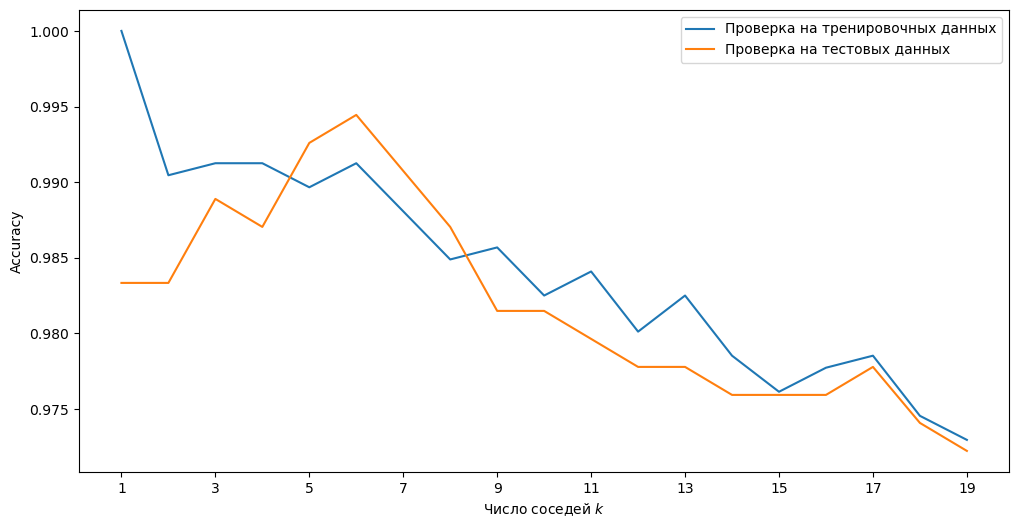

In [22]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,20), accs_train, label = 'Проверка на тренировочных данных')
plt.plot(np.arange(1,20), accs_test, label = 'Проверка на тестовых данных')
plt.legend()
plt.xticks(range(1,20,2))
plt.xlabel(r'Число соседей $k$')
plt.ylabel('Accuracy');

&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

&#x1f4a1; **Ответ**: Потому что мы сравниваем с одним соседом, а это он же и есть, так как обучалось на той же тренировочной выборке.

Сделайте выводы о характере зависимости кривых качества на трейне и тесте. Чем может быть обусловлена такая зависимость?

**Вывод:** Метрика падает с увеличением количества соседей, так как у нас в целом не очень большая выборка и тогда мы с таким большим количеством соседей хуже определяем нашу точку.
А вот на тестовой выборке у нас будет оптимум соседей с максимальной точностью.